# Load data into Spark DataFrame

In [1]:
from pyspark import SparkContext

In [2]:
import pyspark.sql.functions as F

In [3]:
# We use matplotlib for plotting
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline

In [4]:
df = spark.read.csv('/Users/vl/Downloads/BitTiger-DS501-1805-master/Capstone/Capstone_Music_Box_Spark/src/data/event_ds.csv',header=True).cache()
df

DataFrame[uid: string, event: string, song_id: string, date: string]

In [5]:
df.show()

+---------+-----+--------+----------+
|      uid|event| song_id|      date|
+---------+-----+--------+----------+
|168551042|    P|  505355|2017-03-30|
|168551417|    P|  727161|2017-03-30|
|168551408|    P|15750838|2017-03-30|
|168548493|    P| 6661513|2017-03-30|
|168551221|    P| 5914258|2017-03-30|
|168548942|    P| 4112522|2017-03-30|
|168548493|    P|19586155|2017-03-30|
|168549013|    P| 5256343|2017-03-30|
|168548682|    P| 6751795|2017-03-30|
|168548493|    P|20671123|2017-03-30|
|168551182|    P|23491653|2017-03-30|
|168550532|    P|   79479|2017-03-30|
|168548493|    P| 4371507|2017-03-30|
|168550869|    P|   91623|2017-03-30|
|168550351|    P| 3442391|2017-03-30|
|168548493|    P| 4646566|2017-03-30|
|168551221|    P|23038272|2017-03-30|
|168550943|    P|23491660|2017-03-30|
|168551417|    P| 6686174|2017-03-30|
| 24051972|    P| 6684200|2017-03-30|
+---------+-----+--------+----------+
only showing top 20 rows



In [6]:
# create new or overwrite original field with withColumn
df = df.withColumn('date',F.col('date').cast('date'))
df

DataFrame[uid: string, event: string, song_id: string, date: date]

In [7]:
df.show()

+---------+-----+--------+----------+
|      uid|event| song_id|      date|
+---------+-----+--------+----------+
|168551042|    P|  505355|2017-03-30|
|168551417|    P|  727161|2017-03-30|
|168551408|    P|15750838|2017-03-30|
|168548493|    P| 6661513|2017-03-30|
|168551221|    P| 5914258|2017-03-30|
|168548942|    P| 4112522|2017-03-30|
|168548493|    P|19586155|2017-03-30|
|168549013|    P| 5256343|2017-03-30|
|168548682|    P| 6751795|2017-03-30|
|168548493|    P|20671123|2017-03-30|
|168551182|    P|23491653|2017-03-30|
|168550532|    P|   79479|2017-03-30|
|168548493|    P| 4371507|2017-03-30|
|168550869|    P|   91623|2017-03-30|
|168550351|    P| 3442391|2017-03-30|
|168548493|    P| 4646566|2017-03-30|
|168551221|    P|23038272|2017-03-30|
|168550943|    P|23491660|2017-03-30|
|168551417|    P| 6686174|2017-03-30|
| 24051972|    P| 6684200|2017-03-30|
+---------+-----+--------+----------+
only showing top 20 rows



# Some exploration

In [8]:
# simple count rows
df.count()

12282564

In [9]:
# select operation, count distinct rows
df.select('uid').distinct().count()

59079

In [10]:
# group by aggregation
df.groupBy('event').count().show()

+-----+--------+
|event|   count|
+-----+--------+
|    D|  601142|
|    S|  772676|
|    P|10908746|
+-----+--------+



In [11]:
# group by aggregation, more general (count, min, max, mean), multiple at once
df.groupBy('event').agg(
    F.count(F.col('uid')).alias('count'),
    F.max(F.col('uid')).alias('max_uid')
).show()

+-----+--------+--------+
|event|   count| max_uid|
+-----+--------+--------+
|    D|  601142|99765326|
|    S|  772676|99765326|
|    P|10908746|99765326|
+-----+--------+--------+



In [12]:
# filter operation
# group by aggregation
# order by operation
df.filter((F.col('date')>='2017-04-01') & (F.col('date')<='2017-04-05')) \
                    .groupBy('date','event').count() \
                    .orderBy('date','event').show()

+----------+-----+------+
|      date|event| count|
+----------+-----+------+
|2017-04-01|    D| 28083|
|2017-04-01|    P|479775|
|2017-04-01|    S| 33434|
|2017-04-02|    D| 23729|
|2017-04-02|    P|438745|
|2017-04-02|    S| 30219|
|2017-04-03|    D| 18347|
|2017-04-03|    P|248237|
|2017-04-03|    S| 25263|
|2017-04-04|    D| 22831|
|2017-04-04|    P|373444|
|2017-04-04|    S| 25478|
|2017-04-05|    D| 14837|
|2017-04-05|    P|304560|
|2017-04-05|    S| 20059|
+----------+-----+------+



In [13]:
date_count = df.groupBy('date').count().toPandas()

In [14]:
from matplotlib.dates import date2num

(array([736410., 736420., 736430., 736440., 736450., 736460., 736470.]),
 <a list of 7 Text xticklabel objects>)

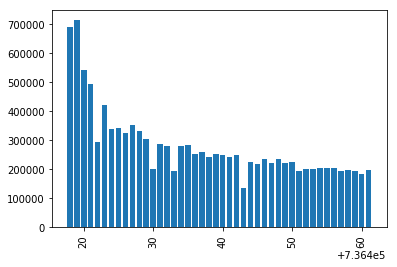

In [15]:
plt.bar(date2num(date_count['date']),date_count['count'])
plt.xticks(rotation='vertical')

# Label definition

In [16]:
import datetime
from dateutil import parser

label_window_size = 14
label_window_end_date = parser.parse('2017-05-12').date()
label_window_start_date = label_window_end_date - datetime.timedelta(label_window_size - 1)
print('label window:',label_window_start_date,'~',label_window_end_date,'days:',label_window_size)

feature_window_size = 30
feature_window_end_date = label_window_start_date - datetime.timedelta(1)
feature_window_start_date = feature_window_end_date  - datetime.timedelta(feature_window_size - 1)
print('feature window:',feature_window_start_date,'~',feature_window_end_date,'days:',feature_window_size)

label window: 2017-04-29 ~ 2017-05-12 days: 14
feature window: 2017-03-30 ~ 2017-04-28 days: 30


In [17]:
# all the uid we will model
df_model_uid = df.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))\
                    .select('uid').distinct()
# active in label window (active label=0)
df_active_uid_in_label_window = df.filter((F.col('date')>=label_window_start_date) & (F.col('date')<=label_window_end_date))\
                            .select('uid').distinct().withColumn('label',F.lit(0))

In [18]:
# prepare label data (churn label=1; active label=0)
df_label = df_model_uid.join(df_active_uid_in_label_window,on=['uid'],how='left')
df_label = df_label.fillna(1)

In [19]:
df_label.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1|35878|
|    0|21899|
+-----+-----+



# Feature generation

### Frequency features

In [20]:
# event_data in feature_window
df_feature_window = df.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))

In [21]:
# define a function to generate frequency features for a list of time windows
# using when().otherwise(), and list comprehension trick!
def frequency_feature_generation_time_windows(df,event,time_window_list,snapshot_date):
    """
    generate frequency features for one event type and a list of time windows
    """
    df_feature = df \
        .filter(F.col('event')==event) \
        .groupBy('uid') \
        .agg(*[F.sum(F.when((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date),1).otherwise(0)).alias('freq_'+event+'_last_'+str(time_window)) \
                for time_window in time_window_list]
            )# *[] opens list and make them comma separated
    return df_feature

In [22]:
# generate one event type, all time windows 
event = 'S'
time_window_list = [1,3,7,14,30]
snapshot_date = feature_window_end_date
df_feature = frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date)
df_feature.show(5)

+---------+-------------+-------------+-------------+--------------+--------------+
|      uid|freq_S_last_1|freq_S_last_3|freq_S_last_7|freq_S_last_14|freq_S_last_30|
+---------+-------------+-------------+-------------+--------------+--------------+
|167587246|            6|            7|           21|            37|            75|
|168000523|            0|            0|            0|            33|            43|
|167930539|            0|            0|            0|             0|            12|
|168028443|            2|            5|           13|            13|            17|
|167882566|            0|            3|           14|            21|            48|
+---------+-------------+-------------+-------------+--------------+--------------+
only showing top 5 rows



In [23]:
# generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
time_window_list = [1,3,7,14,30]
df_feature_list = []
for event in event_list:
    df_feature_list.append(frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date))
    

In [24]:
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint, freq_P_last_3: bigint, freq_P_last_7: bigint, freq_P_last_14: bigint, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint, freq_D_last_3: bigint, freq_D_last_7: bigint, freq_D_last_14: bigint, freq_D_last_30: bigint],
 DataFrame[uid: string, freq_S_last_1: bigint, freq_S_last_3: bigint, freq_S_last_7: bigint, freq_S_last_14: bigint, freq_S_last_30: bigint]]

### Recency features

In [25]:
# defined as days from last event
def recency_feature_generation(df, event, snapshot_date):
    df_feature = df\
        .filter(F.col('event')==event)\
        .groupBy(F.col('uid'))\
        .agg(F.max(F.col('date')).alias('last_event_date'))
    
    df_feature = df_feature.withColumn("time_to_last_event", 
              datediff(to_date(lit(snapshot_date)),
                       to_date((F.col("last_event_date"))))).select(F.col('uid'),F.col('time_to_last_event').alias('time_to_last_'+ event))
    return(df_feature)

In [26]:
# generate recency feature for one event type
from pyspark.sql.functions import datediff, to_date, lit
event = 'D'
snapshot_date = feature_window_end_date
df_recency = recency_feature_generation(df_feature_window,event,snapshot_date)
df_recency.show(5)

+---------+--------------+
|      uid|time_to_last_D|
+---------+--------------+
|167587246|             0|
|167606193|            11|
|168028443|             0|
|153361173|             0|
|168000523|            10|
+---------+--------------+
only showing top 5 rows



In [27]:
# generate recency features for all event types
event_list = ['P','D','S']
df_recency_list = []
for event in event_list:
    df_recency_list.append(recency_feature_generation(df_feature_window,event,snapshot_date))

In [28]:
df_recency_list

[DataFrame[uid: string, time_to_last_P: int],
 DataFrame[uid: string, time_to_last_D: int],
 DataFrame[uid: string, time_to_last_S: int]]

### Profile features

In [29]:
df_play = spark.read.csv('/Users/vl/Downloads/BitTiger-DS501-1805-master/Capstone/Capstone_Music_Box_Spark/src/data/play_ds.csv',header=True)
df_play.show(5)

+---------+------+--------+----------+--------------------+-----------+
|      uid|device| song_id|      date|           play_time|song_length|
+---------+------+--------+----------+--------------------+-----------+
|168551042|    ar|  505355|2017-03-30|                 106|        277|
|168551417|    ar|  727161|2017-03-30|                  27|        226|
|168551408|    ar|15750838|2017-03-30|7>(123.138.230.80)TM|          0|
|168548493|    ip| 6661513|2017-03-30|                  63|        243|
|168551221|    ar| 5914258|2017-03-30|                   2|        276|
+---------+------+--------+----------+--------------------+-----------+
only showing top 5 rows



In [30]:
df_play_feature_window = df_play.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))
df_profile_tmp = df_play_feature_window.select('uid','device').distinct()

In [31]:
df_profile_tmp.groupBy('device').count().show()

+------+-----+
|device|count|
+------+-----+
|    mc|    1|
|    ar|50346|
|    ip| 7324|
+------+-----+



In [32]:
# check if one user has two devices
df_profile_tmp.count()

57671

In [33]:
df_profile_tmp.distinct().count()

57671

In [34]:
df_profile_tmp = df_profile_tmp.withColumn('device_type',F.when(F.col('device')=='ip',1).otherwise(2))
df_profile_tmp.groupBy('device_type').count().show()

+-----------+-----+
|device_type|count|
+-----------+-----+
|          1| 7324|
|          2|50347|
+-----------+-----+



In [35]:
df_profile = df_label.select('uid').join(df_profile_tmp.select('uid','device_type'),on='uid',how='left')
df_profile.groupBy('device_type').count().show()

+-----------+-----+
|device_type|count|
+-----------+-----+
|       null|  119|
|          1| 7324|
|          2|50347|
+-----------+-----+



### Total play time features

In [36]:
# generate total song play time features (using play_ds data) for different time window
# using play data (clean play time first, play time may be negative in data)
df_playtime_window = df_play_feature_window.filter(F.col('play_time')>0)
df_playtime_window.show(5)

+---------+------+-------+----------+---------+-----------+
|      uid|device|song_id|      date|play_time|song_length|
+---------+------+-------+----------+---------+-----------+
|168551042|    ar| 505355|2017-03-30|      106|        277|
|168551417|    ar| 727161|2017-03-30|       27|        226|
|168548493|    ip|6661513|2017-03-30|       63|        243|
|168551221|    ar|5914258|2017-03-30|        2|        276|
|168548942|    ip|4112522|2017-03-30|       26|        331|
+---------+------+-------+----------+---------+-----------+
only showing top 5 rows



In [37]:
# define a function to generate playtime features for time_window_list
def playtime_feature_generation_time_windows(df,time_window_list,snapshot_date):
    
    df_playtime = df \
        .groupBy('uid') \
        .agg(*[F.sum(F.when((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date),df_play['play_time']).otherwise(0)).alias('playtime'+'_last_'+str(time_window)) \
                for time_window in time_window_list]
            )
    return df_playtime


In [38]:
df_playtime_list= playtime_feature_generation_time_windows(df_playtime_window,time_window_list,snapshot_date)
df_playtime_list

DataFrame[uid: string, playtime_last_1: double, playtime_last_3: double, playtime_last_7: double, playtime_last_14: double, playtime_last_30: double]

### Other frequency features

In [39]:
# generate counts of songs play 85% of their song length (using play_ds data) for different time window
# using play data (need to clean play time and song length first, play time may be negative in data, song length may be zeros)
df_playtime_window2 = df_play_feature_window.filter((F.col('song_length')>0) & (F.col('play_time')>0))


In [40]:
# define a function to generate playtime features (where songs play 85% of their length) for time_window_list
def playtime_85pp_feature_generation_time_windows(df,time_window_list,snapshot_date):
    
    df_playtime_85pp = df \
        .groupBy('uid') \
        .agg(*[F.sum(F.when((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) \
                            & (F.col('date')<=snapshot_date) \
                            & (F.col('play_time')>=0.85*F.col('song_length')),1)\
                      .otherwise(0))\
               .alias('playtime_85pp'+'_last_'+str(time_window)) \
                for time_window in time_window_list]
            )
    return df_playtime_85pp

In [41]:
df_playtime_85pp_list = playtime_85pp_feature_generation_time_windows(df_playtime_window2,time_window_list,snapshot_date)
df_playtime_85pp_list

DataFrame[uid: string, playtime_85pp_last_1: bigint, playtime_85pp_last_3: bigint, playtime_85pp_last_7: bigint, playtime_85pp_last_14: bigint, playtime_85pp_last_30: bigint]

# Form training data

In [42]:
# join feature data 
def join_feature_data(df_master,df_feature_list):
    for df_feature in df_feature_list:
        df_master = df_master.join(df_feature,on='uid',how='left')
        #df_master.persist() # uncomment if number of joins is too many
    return df_master
    

In [43]:
# join all frequency features
df_model_final = join_feature_data(df_label,df_feature_list)

In [44]:
# join all profile features
df_model_final = join_feature_data(df_model_final,[df_profile])

In [45]:
# join recency features
df_model_final = join_feature_data(df_model_final,df_recency_list)

In [46]:
# join total playtime features
df_model_final = join_feature_data(df_model_final,[df_playtime_list])

In [47]:
# join total playtime_85pp features
df_model_final = join_feature_data(df_model_final,[df_playtime_85pp_list])

In [48]:
df_model_final.fillna(0).toPandas().to_csv('/Users/vl/Downloads/BitTiger-DS501-1805-master/Capstone/Capstone_Music_Box_Spark/src/data/df_model_final.csv',index=False)

In [49]:
df_model_final.show(1)

+---------+-----+-------------+-------------+-------------+--------------+--------------+-------------+-------------+-------------+--------------+--------------+-------------+-------------+-------------+--------------+--------------+-----------+--------------+--------------+--------------+---------------+---------------+---------------+----------------+----------------+--------------------+--------------------+--------------------+---------------------+---------------------+
|      uid|label|freq_P_last_1|freq_P_last_3|freq_P_last_7|freq_P_last_14|freq_P_last_30|freq_D_last_1|freq_D_last_3|freq_D_last_7|freq_D_last_14|freq_D_last_30|freq_S_last_1|freq_S_last_3|freq_S_last_7|freq_S_last_14|freq_S_last_30|device_type|time_to_last_P|time_to_last_D|time_to_last_S|playtime_last_1|playtime_last_3|playtime_last_7|playtime_last_14|playtime_last_30|playtime_85pp_last_1|playtime_85pp_last_3|playtime_85pp_last_7|playtime_85pp_last_14|playtime_85pp_last_30|
+---------+-----+-------------+---------